#  Mini-Projet : Analyse de Sentiments avec NumPy, Pandas et Matplotlib

##  Objectif du projet
L’objectif de ce projet est de pratiquer la manipulation et l’analyse de données en Python en utilisant  
**NumPy**, **Pandas** et **Matplotlib**, à partir d’un dataset réel de **sentiment analysis**.

##  Données utilisées
Le dataset contient des textes (messages/commentaires) associés à un label de sentiment :
- 0 : sentiment négatif
- 1 : sentimentpositif


##  Travail réalisé
Dans ce projet, nous allons :
- Charger et explorer le dataset avec Pandas
- Analyser la distribution des sentiments
- Manipuler les données sous forme de tableaux NumPy
- Visualiser les résultats avec Matplotlib
- Étudier certaines caractéristiques des textes (ex : longueur)

##  Outils utilisés
- Python
- NumPy
- Pandas
- Matplotlib

##  Résultat attendu
À la fin du projet, nous serons capables de comprendre la structure du dataset,  
d’extraire des informations statistiques simples et de les représenter graphiquement.


In [8]:
#: Charger le dataset CSV avec Pandas.
#Lecture directe d’un CSV distant dans un DataFrame.
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv",
    encoding="latin-1"
)
#Q2. Afficher les premières lignes
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [61]:
df.describe()

,id,label,tweet_length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,13.165196
std,9226.778988,0.255397,5.487709
min,1.000000,0.000000,3.000000
25%,7991.250000,0.000000,9.000000
50%,15981.500000,0.000000,13.000000
75%,23971.750000,0.000000,17.000000
max,31962.000000,1.000000,43.000000


In [62]:
#Description de toutes les colonnes (numérique + texte)
df.describe(include="all")
#include=all inclut tous les colonnes 

,id,label,tweet,tweet_length
count,31962.000000,31962.000000,31962,31962.000000
unique,NaN,NaN,29530,NaN
top,NaN,NaN,#model i love u take with u all the time in ...,NaN
freq,NaN,NaN,319,NaN
mean,15981.500000,0.070146,NaN,13.165196
std,9226.778988,0.255397,NaN,5.487709
min,1.000000,0.000000,NaN,3.000000
25%,7991.250000,0.000000,NaN,9.000000
50%,15981.500000,0.000000,NaN,13.000000
75%,23971.750000,0.000000,NaN,17.000000


In [63]:
#selectionne 5 lignes aleatoire
df.sample(5)

,id,label,tweet,tweet_length
10545,10546,0,physics revision p3&amp;4 tomorrow in the gym....,11
17330,17331,0,@user make better system for renewing season t...,11
2220,2221,0,excellent. final holiday of the year booked fo...,18
6788,6789,0,lunch time! #bettereveryday #cycling @ health...,7
8843,8844,0,imy you alreadyÃ°ÂÂÂÃ°ÂÂÂª(last day of sc...,8


In [65]:
## liste des valeurs uniques
df["label"].unique()
### nombre de valeurs uniques
df["label"].nunique()

2

In [10]:
# afficher Dimensions du dataset
df.shape

(31962, 3)

In [11]:
# Afficher les colonnes
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [14]:
#afficher les infos general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [17]:
#Quelles sont les valeurs possibles du sentiment ?
df["label"].unique()

array([0, 1])

In [18]:
#Combien de tweets pour chaque sentiment ?
df["label"].value_counts()
#Ceci montre la distribution des sentiments.

label
0    29720
1     2242
Name: count, dtype: int64

In [20]:
#Quel sentiment est le plus fréquent ? la class la plus dominante
#le sentiment ici c le label ; label contient sentiment
df["label"].value_counts().idxmax()

np.int64(0)

In [21]:
#Accéder uniquement aux tweets positifs
df[df["label"] == 1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [22]:
#acceder uniquemnt au tweets negative
df[df["label"]==0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [28]:
#df.duplicated() une fct pandas pour verifier si une ligne de df est doublons retourn true false
df.duplicated().sum()
#df duplicate detece si une ligne  entiere est identique a une  ligne precedents 
#il reourne true false par ligne  mais pour dire que on a une repition 


np.int64(0)

In [29]:
#y a t il ds valeurs manquants
#isna() ou isnull() pour detecter les valeurs manquants 
#verifier si une cellule est vide ou manuquante(NAN)
#retourne un dataframe true,ou false
#true : la valeur est manuqnate
#false: la valeur est presentes
df.isna().sum()

id              0
label           0
tweet           0
tweet_length    0
dtype: int64

In [31]:
# supprimer les doublons
df.drop_duplicates(inplace=True)

In [33]:
import numpy as np
#convertir les label en numpy
labels_np = df["label"].to_numpy()
#on tronforme la serie pandas en tableau numpy 

In [34]:
#afficher les 10 premieres lable
label_np[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
#Afficher les labels de la 5ème à la 15ème position
label_np[4:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [40]:
#Afficher les labels à des positions précises (Fancy Indexing)
label_np[[0,5,10,100,120,15,12]]

array([0, 0, 0, 0, 0, 0, 0])

In [42]:
#afficher uniquemnt les labels positives
label_np[label_np == 1]

array([1, 1, 1, ..., 1, 1, 1], shape=(2242,))

In [43]:
#on peut aussi faire pour afficher celle positive:
label_np[label_np > 0 ]

array([1, 1, 1, ..., 1, 1, 1], shape=(2242,))

In [45]:
#compter combien de tweet positive
np.sum(label_np == 1)

np.int64(2242)

In [46]:
# compter combien de tweet est negative
np.sum(label_np == 0)

np.int64(29720)

In [49]:
#inverser le tableau de label
label_np[::-1]

array([0, 1, 0, ..., 0, 0, 0], shape=(31962,))

In [50]:
label_np[:5]

array([0, 0, 0, 0, 0])

In [52]:
df["tweet_length"] = df["tweet"].apply(lambda x: len(x.split()))
df
#df["tweet"] → colonne contenant tous les tweets (texte)
#.apply(...) → on applique une fonction à chaque tweet
#lambda x: len(x) → pour chaque tweet x, on calcule sa longueur (nombre de caractères)

,id,label,tweet,tweet_length
0,1,0,@user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,19
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,14
4,5,0,factsguide: society now #motivation,4
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...,5
31958,31959,0,to see nina turner on the airwaves trying to...,23
31959,31960,0,listening to sad songs on a monday morning otw...,13
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",10


In [53]:
np.mean(label_np)

np.float64(0.07014579813528565)

In [54]:
np.min(label_np)

np.int64(0)

In [55]:
np.max(label_np)

np.int64(1)

In [56]:
np.sum(label_np)

np.int64(2242)

In [57]:
np.median(label_np)

np.float64(0.0)

In [58]:
#ecarttype
np.std(label_np)

np.float64(0.25539257064223586)

In [84]:
#normalisation :Ramène les valeurs dans un intervalle précis, généralement [0, 1].
df["tweet_length_norm"] = (df["tweet_length"] - df["tweet_length"].min()) / \
                          (df["tweet_length"].max() - df["tweet_length"].min())
df[["tweet_length", "tweet_length_norm"]].head()
#On crée une nouvelle colonne tweet_length_norm
#Chaque valeur est transformée pour être entre 0 et 1
#Permet de comparer facilement les longueurs de tweets sur une même échelle, même si certaines sont très longues.

,tweet_length,tweet_length_norm
0,18,0.375
1,19,0.400
2,3,0.000
3,14,0.275
4,4,0.025


In [85]:
#Standardisation de la longueur des tweets
df["tweet_length_std"] = (df["tweet_length"] - df["tweet_length"].mean()) / df["tweet_length"].std()

df[["tweet_length", "tweet_length_std"]].head()
#On crée une nouvelle colonne tweet_length_std
#Chaque valeur est centrée autour de 0 avec écart-type = 1
#ecart type: cest une mesure qui indique a quel point les valeurs d un dataset sont dispersees autour de la moyenne.
#Si l’écart-type est petit → les valeurs sont proches de la moyenne
#Si l’écart-type est grand → les valeurs sont très dispersées

,tweet_length,tweet_length_std
0,18,0.881024
1,19,1.063250
2,3,-1.852357
3,14,0.152122
4,4,-1.670132


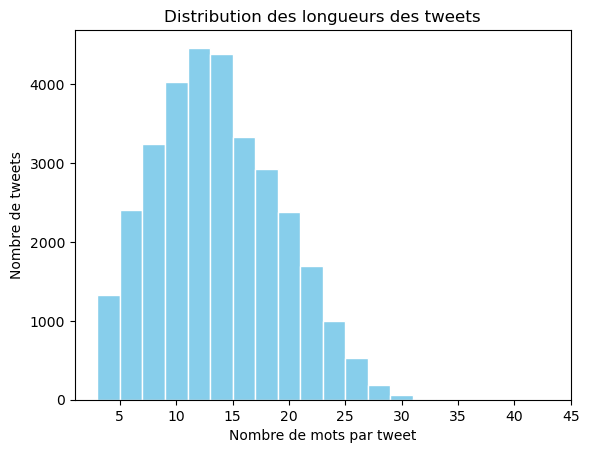

In [70]:
##Histogramme###
#Histogramme des longueurs de tweets
#Montre comment les longueurs des tweets sont réparties.
#bins=20 → divise les valeurs en 20 intervalles
#Utile pour voir si la plupart des tweets sont courts ou longs.
import matplotlib.pyplot as plt
plt.hist(df["tweet_length"], bins=20, color="skyblue", edgecolor="white")
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Nombre de mots par tweet")
plt.ylabel("Nombre de tweets")
plt.show()


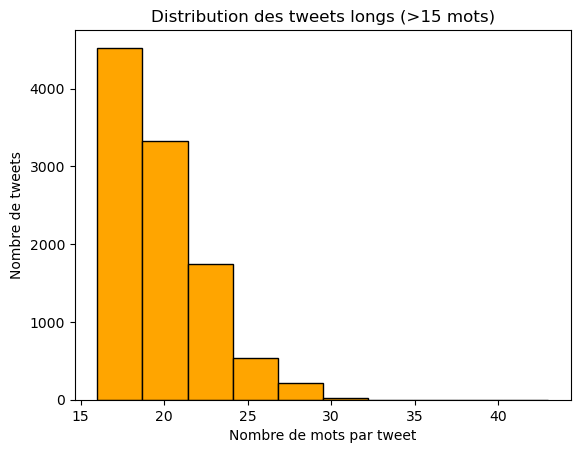

In [78]:
#Histogramme des tweets longs (plus de 15 mots)
#On filtre le DataFrame pour tweets supérieurs à 15 mots
#L’histogramme montre la distribution uniquement des tweets longs
long_tweets = df[df["tweet_length"] > 15]
plt.hist(long_tweets["tweet_length"], bins=10, color="orange", edgecolor="black")
plt.title("Distribution des tweets longs (>15 mots)")
plt.xlabel("Nombre de mots par tweet")
plt.ylabel("Nombre de tweets")
plt.show()

Text(0.5, 0, 'Sentiment (0=Négatif, 1=Positif)')

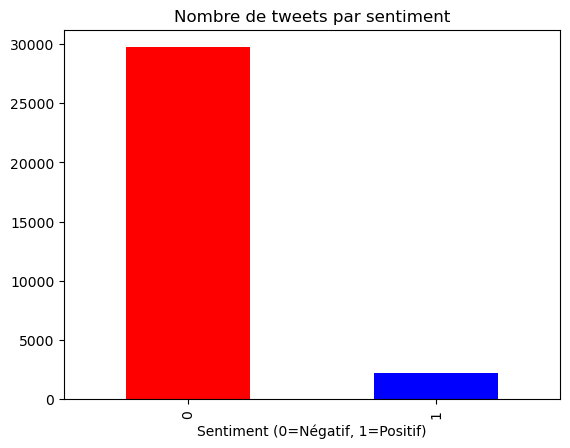

In [73]:
###Barres###

#Diagramme en barres du nombre de tweets par sentiment
#value_counts() compte le nombre de tweets pour chaque label
#kind="bar" → diagramme en barres
#df["label"] → sélectionne la colonne label du DataFrame
#.value_counts() → compte combien de fois chaque valeur apparaît dans cette colonne
df["label"].value_counts().plot(kind="bar", color=["red", "blue"])
plt.title("Nombre de tweets par sentiment")
plt.xlabel("Sentiment (0=Négatif, 1=Positif)")
plt.ylabel("Nombre de tweets")

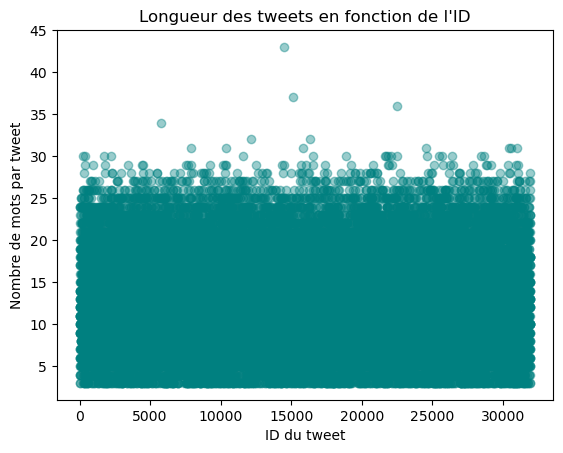

In [82]:
#scatter plot longueur des tweets vs ID
plt.scatter(df["id"], df["tweet_length"], alpha=0.4, color="teal")
plt.title("Longueur des tweets en fonction de l'ID")
plt.xlabel("ID du tweet")
plt.ylabel("Nombre de mots par tweet")
plt.show()

Text(0, 0.5, '')

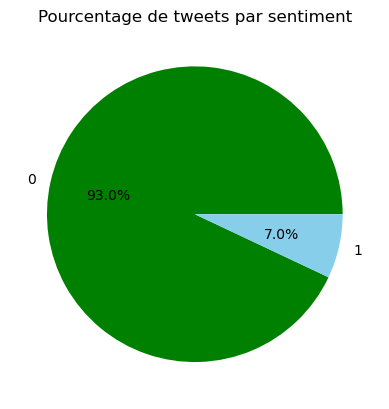

In [81]:
###Pie chart###
#Diagramme circulaire (pie chart) des sentiments
#autopct="%1.1f%%" → affiche le pourcentage de chaque portion
df["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "skyblue"])
plt.title("Pourcentage de tweets par sentiment")
plt.ylabel("")  # on enlève le label de l'axe y

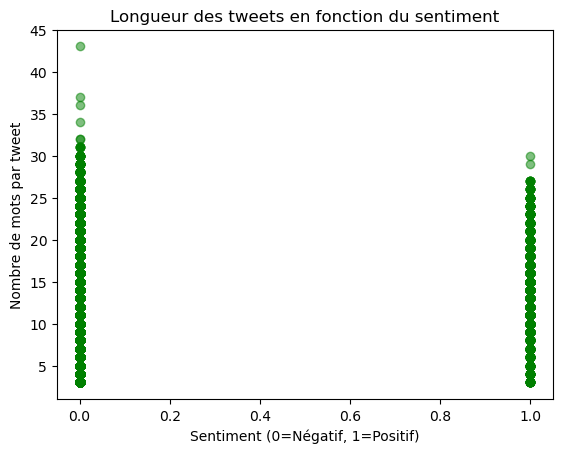

In [76]:
###oxplot###
#Boxplot des longueurs de tweets par sentiment
plt.scatter(df["label"], df["tweet_length"], alpha=0.5, color="green")
plt.title("Longueur des tweets en fonction du sentiment")
plt.xlabel("Sentiment (0=Négatif, 1=Positif)")
plt.ylabel("Nombre de mots par tweet")
plt.show()
#Chaque point = un tweet
#alpha=0.5 → rend les points semi-transparents
#Permet de visualiser la variabilité des longueurs pour chaque sentiment.